In [43]:
import cv2

In [44]:
import matplotlib.pyplot as plt

In [45]:
img1 = cv2.imread('sujeet.JPG')
img2 = cv2.imread('nature.jpg')
img2 = cv2.resize(img2,(1200,1200))

In [46]:
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

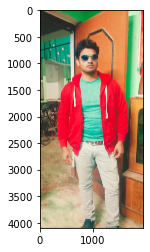

In [47]:
plt.imshow(img1)

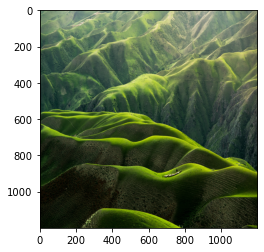

In [48]:
plt.imshow(img2)

In [49]:
img1.shape

(4096, 1944, 3)

In [50]:
x_offset = 1944-1200
y_offset = 4096-1200

In [51]:
img2.shape

(1200, 1200, 3)

In [52]:
rows, cols, channels = img2.shape

In [53]:
rows

1200

In [54]:
cols

1200

In [55]:
channels

3

In [56]:
roi = img1[y_offset:4096,x_offset:1944]

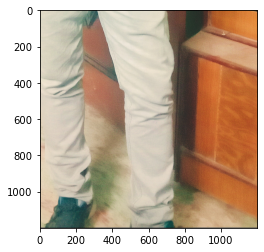

In [57]:
plt.imshow(roi)

In [58]:
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

In [59]:
img2gray.shape

(1200, 1200)

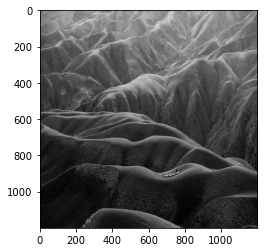

In [60]:
plt.imshow(img2gray,cmap='gray')

In [61]:
mask_inv = cv2.bitwise_not(img2gray)

In [62]:
mask_inv.shape

(1200, 1200)

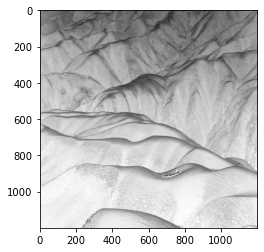

In [63]:
plt.imshow(mask_inv,cmap='gray')

In [64]:
import numpy as np

In [65]:
white_bg = np.full(img2.shape, 255, dtype=np.uint8)

In [66]:
bk = cv2.bitwise_or(white_bg,white_bg,mask=mask_inv)

In [67]:
bk.shape

(1200, 1200, 3)

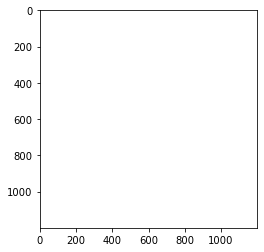

In [68]:
plt.imshow(bk)

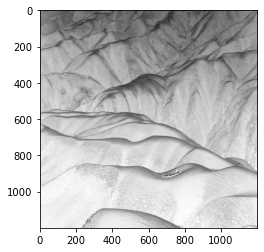

In [69]:
plt.imshow(mask_inv,cmap='gray')

In [70]:
fg = cv2.bitwise_or(img2, img2,mask=mask_inv)

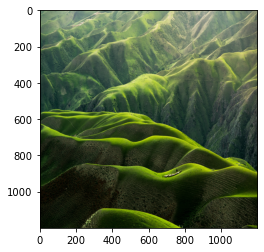

In [71]:
plt.imshow(fg)

In [72]:
fg.shape

(1200, 1200, 3)

In [73]:
final_roi = cv2.bitwise_or(roi,fg)

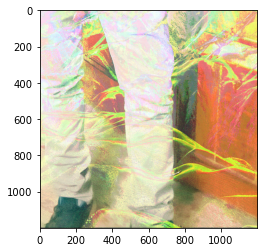

In [74]:
plt.imshow(final_roi)

In [75]:
large = img1
small = final_roi

In [76]:
large[y_offset:y_offset+small.shape[0],x_offset:x_offset+small.shape[1]]=small

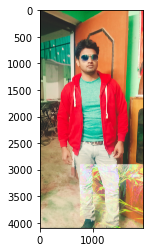

In [77]:
plt.imshow(large)